**Проект: Исследование поведения пользователей сервиса аренды самокатов**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats as st


####  Загрузка данных

In [2]:
df_users = pd.read_csv('/datasets/users_go.csv')  # пользователи 
df_rides = pd.read_csv('/datasets/rides_go.csv') # поездки
df_subscriptions = pd.read_csv('/datasets/subscriptions_go.csv') # подписки 


In [3]:
# функция для просмотра основной информации о таблицах
def analyze_df(df):
    print('5 случайных строк датафрейма')
    display(df.sample(5))
    print('---------------------------------------------------------------------------------------------------------')
    print('Информации о датафрейме')
    display(df.info())
    print('---------------------------------------------------------------------------------------------------------')
    print('Пропуски')
    display(df.isna().sum())
    print('---------------------------------------------------------------------------------------------------------')
    print('Явные дубликаты')
    display(df.duplicated().sum())
    print('---------------------------------------------------------------------------------------------------------')
    print('Проверка количественных значений')
    display(df.describe())

In [4]:
analyze_df(df_users)  # пользователи

5 случайных строк датафрейма


,user_id,name,age,city,subscription_type
374,375,Алексей,34,Омск,ultra
1546,924,Мария,23,Пятигорск,free
183,184,Эльвира,15,Пятигорск,ultra
186,187,Михаил,28,Пятигорск,ultra
590,591,Тамара,18,Москва,ultra


---------------------------------------------------------------------------------------------------------
Информации о датафрейме
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1565 entries, 0 to 1564
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   user_id            1565 non-null   int64 
 1   name               1565 non-null   object
 2   age                1565 non-null   int64 
 3   city               1565 non-null   object
 4   subscription_type  1565 non-null   object
dtypes: int64(2), object(3)
memory usage: 61.3+ KB


None

---------------------------------------------------------------------------------------------------------
Пропуски


user_id              0
name                 0
age                  0
city                 0
subscription_type    0
dtype: int64

---------------------------------------------------------------------------------------------------------
Явные дубликаты


31

---------------------------------------------------------------------------------------------------------
Проверка количественных значений


,user_id,age
count,1565.000000,1565.000000
mean,762.633866,24.922045
std,443.260155,4.553496
min,1.000000,12.000000
25%,378.000000,22.000000
50%,762.000000,25.000000
75%,1146.000000,28.000000
max,1534.000000,43.000000


In [5]:
analyze_df(df_rides) # поездки

5 случайных строк датафрейма


,user_id,distance,duration,date
8882,878,4659.850868,23.532836,2021-06-08
9348,912,4866.918514,16.273414,2021-03-30
11850,1090,2484.501728,20.845795,2021-06-14
15386,1345,4793.487411,16.652194,2021-10-28
6777,718,4413.412554,31.653650,2021-10-26


---------------------------------------------------------------------------------------------------------
Информации о датафрейме
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18068 entries, 0 to 18067
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   user_id   18068 non-null  int64  
 1   distance  18068 non-null  float64
 2   duration  18068 non-null  float64
 3   date      18068 non-null  object 
dtypes: float64(2), int64(1), object(1)
memory usage: 564.8+ KB


None

---------------------------------------------------------------------------------------------------------
Пропуски


user_id     0
distance    0
duration    0
date        0
dtype: int64

---------------------------------------------------------------------------------------------------------
Явные дубликаты


0

---------------------------------------------------------------------------------------------------------
Проверка количественных значений


,user_id,distance,duration
count,18068.000000,18068.000000,18068.000000
mean,842.869936,3070.659976,17.805011
std,434.734317,1116.831209,6.091051
min,1.000000,0.855683,0.500000
25%,487.000000,2543.226360,13.597563
50%,889.000000,3133.609994,17.678395
75%,1213.250000,3776.222735,21.724800
max,1534.000000,7211.007745,40.823963


In [6]:
df_subscriptions # подписки

,subscription_type,minute_price,start_ride_price,subscription_fee
0,free,8,50,0
1,ultra,6,0,199


In [7]:
df_subscriptions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   subscription_type  2 non-null      object
 1   minute_price       2 non-null      int64 
 2   start_ride_price   2 non-null      int64 
 3   subscription_fee   2 non-null      int64 
dtypes: int64(3), object(1)
memory usage: 192.0+ bytes


#### Предобработка данных

In [8]:
# преобразование типа данных в дату
df_rides['date'] = pd.to_datetime(df_rides['date'])

df_rides.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18068 entries, 0 to 18067
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   user_id   18068 non-null  int64         
 1   distance  18068 non-null  float64       
 2   duration  18068 non-null  float64       
 3   date      18068 non-null  datetime64[ns]
dtypes: datetime64[ns](1), float64(2), int64(1)
memory usage: 564.8 KB


In [9]:
df_rides['date'].min()

Timestamp('2021-01-01 00:00:00')

In [10]:
df_rides['date'].max()

Timestamp('2021-12-30 00:00:00')

In [11]:
# Создаем новый столбец 'month' с номером  месяца 
df_rides['month'] = df_rides['date'].dt.month

df_rides.sample(5)

,user_id,distance,duration,date,month
7709,786,361.149468,13.140472,2021-09-03,9
59,5,3218.515955,19.724438,2021-10-07,10
4230,457,2989.493493,17.798679,2021-01-14,1
2826,302,1004.882613,13.546645,2021-07-21,7
14849,1306,1727.864199,13.936755,2021-08-14,8


In [12]:
# Удаляем явные дубликаты
df_users = df_users.drop_duplicates()

df_users.duplicated().sum()

0

In [13]:
df_users[df_users['user_id'].duplicated(keep=False)].sort_values(by='user_id')

,user_id,name,age,city,subscription_type


**Удалены явные дубликаты в таблице df_users.  
Преобразован тип данных в дату в таблице df_rides.  
Создан новый столбец с номером месяца (данные за один год).  
Других проблем не выявлено .**

####  Исследовательский анализ данных

Общая информация о пользователях и поездках

3.1 Частота встречаемости городов

In [14]:
df_users['city'].value_counts(normalize=True)

Пятигорск         0.142764
Екатеринбург      0.132986
Ростов-на-Дону    0.129074
Краснодар         0.125815
Сочи              0.123207
Омск              0.119296
Тюмень            0.117340
Москва            0.109518
Name: city, dtype: float64

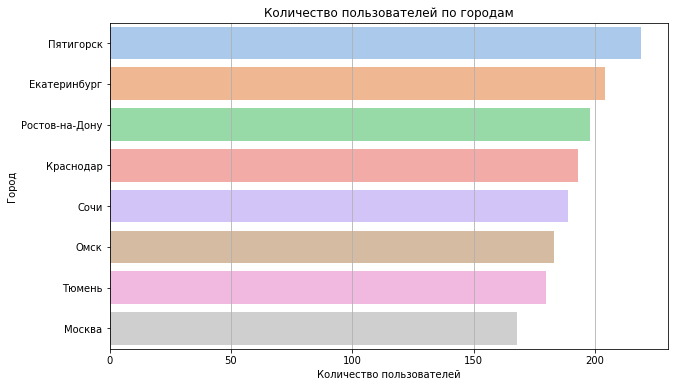

In [15]:
city_counts = df_users['city'].value_counts()
plt.figure(figsize=(10, 6))
sns.barplot(x=city_counts.values, y=city_counts.index, palette='pastel')
plt.title('Количество пользователей по городам')
plt.xlabel('Количество пользователей')
plt.ylabel('Город')
plt.grid(axis='x')
plt.show()


**Больше всего пользователей зарегистрировано в Пятигорске, меньше всего — в Москве. В остальных городах количество пользователей распределено равномерно.**

3.2 Соотношение пользователей с подпиской и без подписки

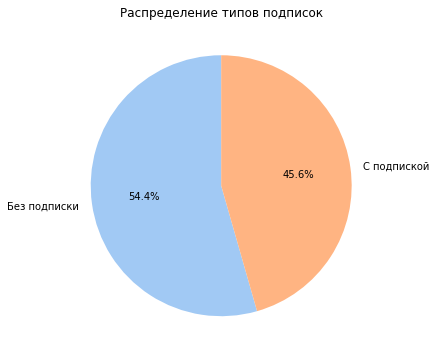

In [16]:
subscription_counts = df_users['subscription_type'].value_counts(normalize=True)


labels = ['С подпиской' if x == 'ultra' else 'Без подписки' for x in subscription_counts.index]
plt.figure(figsize=(10, 6))
plt.pie(subscription_counts, labels=labels, autopct='%1.1f%%', startangle=90, colors=sns.color_palette("pastel"))
plt.title('Распределение типов подписок')
plt.show()


**Подписчиков на 8,8% меньше, чем пользователей без подписки.**

3.3 Возраст пользователей

In [17]:
df_users['age'].describe()

count    1534.000000
mean       24.903520
std         4.572367
min        12.000000
25%        22.000000
50%        25.000000
75%        28.000000
max        43.000000
Name: age, dtype: float64

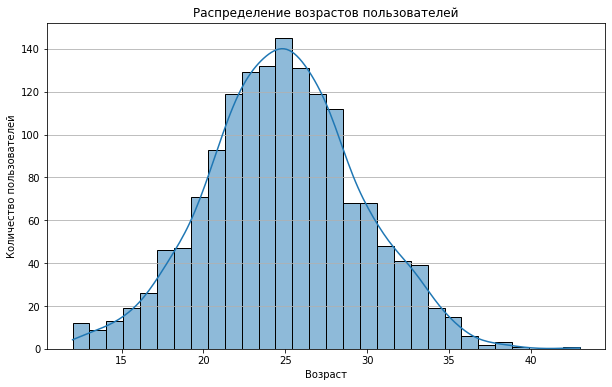

In [18]:
plt.figure(figsize=(10, 6))
sns.histplot(df_users['age'], kde=True)
plt.title('Распределение возрастов пользователей')
plt.xlabel('Возраст')
plt.ylabel('Количество пользователей')
plt.grid(axis='y')
plt.show()


**Распределение возраста пользователей сервиса подчиняется нормальному распределению, в основном им по 25 лет.**

 3.4 Расстояние, которое пользователь преодолел за одну поездку 

In [19]:
df_rides['distance'].describe()

count    18068.000000
mean      3070.659976
std       1116.831209
min          0.855683
25%       2543.226360
50%       3133.609994
75%       3776.222735
max       7211.007745
Name: distance, dtype: float64

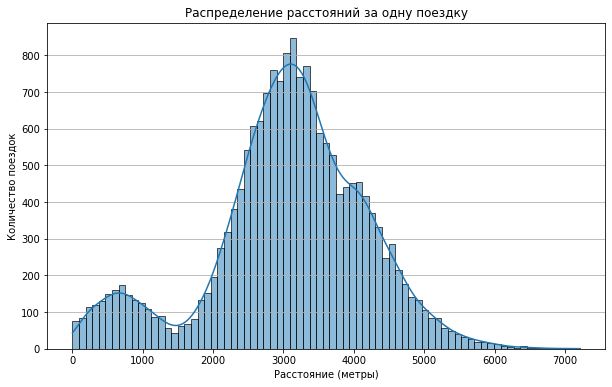

In [20]:
plt.figure(figsize=(10, 6))
sns.histplot(df_rides['distance'], kde=True)
plt.title('Распределение расстояний за одну поездку')
plt.xlabel('Расстояние (метры)')
plt.ylabel('Количество поездок')
plt.grid(axis='y')
plt.show()


**Медиана расстояния за одну поездку составляет 3,13 км. Подчиняется нормальному распределению.**

3.5 Продолжительность поездок

In [21]:
df_rides['duration'].describe()

count    18068.000000
mean        17.805011
std          6.091051
min          0.500000
25%         13.597563
50%         17.678395
75%         21.724800
max         40.823963
Name: duration, dtype: float64

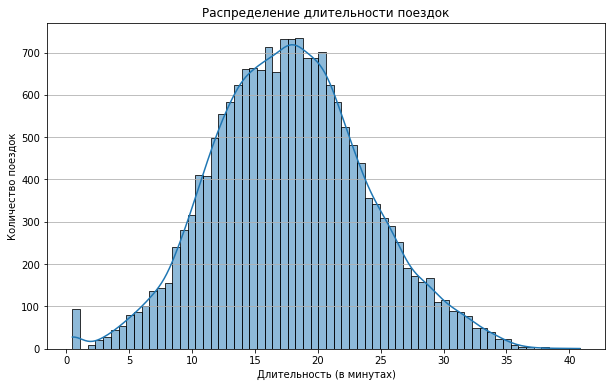

In [22]:
plt.figure(figsize=(10, 6))
sns.histplot(df_rides['duration'], kde=True)
plt.title('Распределение длительности поездок')
plt.xlabel('Длительность (в минутах)')
plt.ylabel('Количество поездок')
plt.grid(axis='y')
plt.show()


In [23]:
df_rides[df_rides['duration'] == 0.5]['distance'].describe()

count      95.000000
mean     5113.176549
std       658.254104
min      4030.308008
25%      4611.510820
50%      5052.769411
75%      5488.459099
max      7211.007745
Name: distance, dtype: float64

**Поездка в среднем длится 17,8 мин, медиана — 17,6, разница несущественная. Распределение нормальное.  
95 поездок заняли всего полминуты, при этом пользователи проехали расстояние от 4 км. Самокаты не могут развивать такую скорость. Стоит обратить на это внимание.**

#### Объединение данных

4.1 Объединение данных о пользователях, поездках и подписках в один датафрейм.


In [24]:
merged_df = pd.merge(df_users, df_rides, on='user_id', how='inner')

# Объединение DataFrame по столбцу 'subscription_type'
merged_df = pd.merge(merged_df, df_subscriptions, on='subscription_type', how='inner')

merged_df

,user_id,name,age,city,subscription_type,distance,duration,date,month,minute_price,start_ride_price,subscription_fee
0,1,Кира,22,Тюмень,ultra,4409.919140,25.599769,2021-01-01,1,6,0,199
1,1,Кира,22,Тюмень,ultra,2617.592153,15.816871,2021-01-18,1,6,0,199
2,1,Кира,22,Тюмень,ultra,754.159807,6.232113,2021-04-20,4,6,0,199
3,1,Кира,22,Тюмень,ultra,2694.783254,18.511000,2021-08-11,8,6,0,199
4,1,Кира,22,Тюмень,ultra,4028.687306,26.265803,2021-08-28,8,6,0,199
...,...,...,...,...,...,...,...,...,...,...,...,...
18063,1534,Альберт,25,Краснодар,free,3781.098080,19.822962,2021-11-04,11,8,50,0
18064,1534,Альберт,25,Краснодар,free,2840.423057,21.409799,2021-11-16,11,8,50,0
18065,1534,Альберт,25,Краснодар,free,3826.185507,18.435051,2021-11-18,11,8,50,0
18066,1534,Альберт,25,Краснодар,free,2902.308661,16.674362,2021-11-27,11,8,50,0


4.2 Создание двух датафреймав из датафрейма, созданного на этапе 4.1:

In [25]:
user_ultra = merged_df[merged_df['subscription_type'] == 'ultra']
user_ultra

,user_id,name,age,city,subscription_type,distance,duration,date,month,minute_price,start_ride_price,subscription_fee
0,1,Кира,22,Тюмень,ultra,4409.919140,25.599769,2021-01-01,1,6,0,199
1,1,Кира,22,Тюмень,ultra,2617.592153,15.816871,2021-01-18,1,6,0,199
2,1,Кира,22,Тюмень,ultra,754.159807,6.232113,2021-04-20,4,6,0,199
3,1,Кира,22,Тюмень,ultra,2694.783254,18.511000,2021-08-11,8,6,0,199
4,1,Кира,22,Тюмень,ultra,4028.687306,26.265803,2021-08-28,8,6,0,199
...,...,...,...,...,...,...,...,...,...,...,...,...
6495,699,Оксана,22,Москва,ultra,3973.046497,24.671163,2021-08-29,8,6,0,199
6496,699,Оксана,22,Москва,ultra,3288.702563,15.892886,2021-09-12,9,6,0,199
6497,699,Оксана,22,Москва,ultra,3076.159348,14.389525,2021-09-26,9,6,0,199
6498,699,Оксана,22,Москва,ultra,4707.845501,15.839579,2021-10-17,10,6,0,199


Пользователи без подписки

In [26]:
user_free = merged_df[merged_df['subscription_type'] == 'free']
user_free

,user_id,name,age,city,subscription_type,distance,duration,date,month,minute_price,start_ride_price,subscription_fee
6500,700,Айдар,22,Омск,free,2515.690719,14.944286,2021-01-02,1,8,50,0
6501,700,Айдар,22,Омск,free,846.932642,16.234663,2021-02-01,2,8,50,0
6502,700,Айдар,22,Омск,free,4004.434142,20.016628,2021-02-04,2,8,50,0
6503,700,Айдар,22,Омск,free,1205.911290,9.782872,2021-02-10,2,8,50,0
6504,700,Айдар,22,Омск,free,3047.379435,17.427673,2021-02-14,2,8,50,0
...,...,...,...,...,...,...,...,...,...,...,...,...
18063,1534,Альберт,25,Краснодар,free,3781.098080,19.822962,2021-11-04,11,8,50,0
18064,1534,Альберт,25,Краснодар,free,2840.423057,21.409799,2021-11-16,11,8,50,0
18065,1534,Альберт,25,Краснодар,free,3826.185507,18.435051,2021-11-18,11,8,50,0
18066,1534,Альберт,25,Краснодар,free,2902.308661,16.674362,2021-11-27,11,8,50,0


Пользователи с подпиской

In [27]:
user_ultra = merged_df[merged_df['subscription_type'] == 'ultra']
user_ultra

,user_id,name,age,city,subscription_type,distance,duration,date,month,minute_price,start_ride_price,subscription_fee
0,1,Кира,22,Тюмень,ultra,4409.919140,25.599769,2021-01-01,1,6,0,199
1,1,Кира,22,Тюмень,ultra,2617.592153,15.816871,2021-01-18,1,6,0,199
2,1,Кира,22,Тюмень,ultra,754.159807,6.232113,2021-04-20,4,6,0,199
3,1,Кира,22,Тюмень,ultra,2694.783254,18.511000,2021-08-11,8,6,0,199
4,1,Кира,22,Тюмень,ultra,4028.687306,26.265803,2021-08-28,8,6,0,199
...,...,...,...,...,...,...,...,...,...,...,...,...
6495,699,Оксана,22,Москва,ultra,3973.046497,24.671163,2021-08-29,8,6,0,199
6496,699,Оксана,22,Москва,ultra,3288.702563,15.892886,2021-09-12,9,6,0,199
6497,699,Оксана,22,Москва,ultra,3076.159348,14.389525,2021-09-26,9,6,0,199
6498,699,Оксана,22,Москва,ultra,4707.845501,15.839579,2021-10-17,10,6,0,199


4.3 Визуализация информации о расстоянии и времени поездок для пользователей обеих категорий.

In [28]:
user_free['distance'].describe()

count    11568.000000
mean      3045.495282
std       1246.173806
min          0.855683
25%       2366.562689
50%       3114.648465
75%       3905.697894
max       7211.007745
Name: distance, dtype: float64

In [29]:
user_ultra['distance'].describe()

count    6500.000000
mean     3115.445388
std       836.895330
min       244.210438
25%      2785.444017
50%      3148.637229
75%      3560.574425
max      5699.769662
Name: distance, dtype: float64

In [30]:
user_free['duration'].describe()

count    11568.000000
mean        17.390909
std          6.326803
min          0.500000
25%         12.958437
50%         17.326890
75%         21.594071
max         34.948498
Name: duration, dtype: float64

In [31]:
user_ultra['duration'].describe()

count    6500.000000
mean       18.541985
std         5.572048
min         3.760353
25%        14.524654
50%        18.178153
75%        21.884129
max        40.823963
Name: duration, dtype: float64

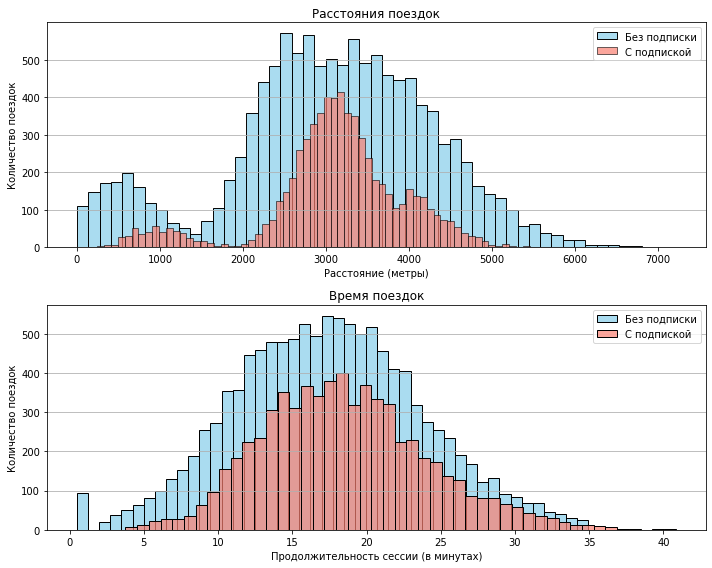

In [32]:

fig, axs = plt.subplots(2, 1, figsize=(10, 8))

# Визуализация расстояния поездок
sns.histplot(user_free['distance'], color='skyblue', alpha=0.7, label='Без подписки', ax=axs[0])
sns.histplot(user_ultra['distance'], color='salmon', alpha=0.7, label='С подпиской', ax=axs[0])
axs[0].set_title('Расстояния поездок')
axs[0].set_xlabel('Расстояние (метры)')
axs[0].set_ylabel('Количество поездок')
axs[0].legend()
axs[0].yaxis.grid(True)  

# Визуализация времени поездок
sns.histplot(user_free['duration'], color='skyblue', alpha=0.7, label='Без подписки', ax=axs[1])
sns.histplot(user_ultra['duration'], color='salmon', alpha=0.7, label='С подпиской', ax=axs[1])
axs[1].set_title('Время поездок')
axs[1].set_xlabel('Продолжительность сессии (в минутах)')
axs[1].set_ylabel('Количество поездок')
axs[1].legend()
axs[1].yaxis.grid(True)  
plt.tight_layout()
plt.show()



**Пользователи без подписки имеют более широкий диапазон значений расстояния по сравнению с пользователями с подпиской.  
Время поездки у пользователей обеих категорий примерно одинаковое. В среднем пользователи с подпиской используют самокат 18 минут, а пользователи без подписки — 17 минут.**

#### Подсчёт выручки

In [33]:
# каждое значение из столбца duration округляется с помощью «потолка»: 
merged_df['duration'] = np.ceil(merged_df['duration']) 

In [34]:
#датафрейм с агрегированными данными о поездках 
df = (merged_df.groupby(['user_id', 'month'])
         .agg(total_distance=('distance', 'sum'),
              total_duration=('duration', 'sum'),
              count_rides=('user_id', 'count'),
              start_ride_price=('start_ride_price', 'first'),
              minute_price=('minute_price', 'first'),
              subscription_fee=('subscription_fee', 'first'),
              subscription_type = ('subscription_type', 'first'))
         .reset_index())

df

,user_id,month,total_distance,total_duration,count_rides,start_ride_price,minute_price,subscription_fee,subscription_type
0,1,1,7027.511294,42.0,2,0,6,199,ultra
1,1,4,754.159807,7.0,1,0,6,199,ultra
2,1,8,6723.470560,46.0,2,0,6,199,ultra
3,1,10,5809.911100,32.0,2,0,6,199,ultra
4,1,11,7003.499363,56.0,3,0,6,199,ultra
...,...,...,...,...,...,...,...,...,...
11326,1534,6,3409.468534,26.0,2,50,8,0,free
11327,1534,8,7622.453034,48.0,2,50,8,0,free
11328,1534,9,4928.173852,23.0,1,50,8,0,free
11329,1534,11,13350.015305,78.0,4,50,8,0,free


Расчет помесячной выручкой, которую принёс каждый пользователь. 

In [35]:
# Функция для расчёта выручки
def revenue(row):
    return row['start_ride_price'] * row['count_rides'] + row['minute_price'] * row['total_duration'] + row['subscription_fee']


df['revenue'] = df.apply(revenue, axis=1)
df

,user_id,month,total_distance,total_duration,count_rides,start_ride_price,minute_price,subscription_fee,subscription_type,revenue
0,1,1,7027.511294,42.0,2,0,6,199,ultra,451.0
1,1,4,754.159807,7.0,1,0,6,199,ultra,241.0
2,1,8,6723.470560,46.0,2,0,6,199,ultra,475.0
3,1,10,5809.911100,32.0,2,0,6,199,ultra,391.0
4,1,11,7003.499363,56.0,3,0,6,199,ultra,535.0
...,...,...,...,...,...,...,...,...,...,...
11326,1534,6,3409.468534,26.0,2,50,8,0,free,308.0
11327,1534,8,7622.453034,48.0,2,50,8,0,free,484.0
11328,1534,9,4928.173852,23.0,1,50,8,0,free,234.0
11329,1534,11,13350.015305,78.0,4,50,8,0,free,824.0


In [36]:
(df.groupby(['subscription_type']).agg(count=('user_id', 'count'),
                                       revenue=('revenue', 'sum'),
                                      )
                                 #выручку на одного пользователя для каждого типа подписки
                                  .assign(relative_revenue =lambda x: (x['revenue'] / x['count']))
                                  .reset_index())


,subscription_type,count,revenue,relative_revenue
0,free,6798,2234104.0,328.641365
1,ultra,4533,1644537.0,362.792191


In [37]:
monthly_revenue = df.groupby(['month', 'subscription_type']).agg(revenue=('revenue', 'sum')).reset_index()
monthly_revenue

,month,subscription_type,revenue
0,1,free,193850.0
1,1,ultra,144108.0
2,2,free,165856.0
3,2,ultra,124572.0
4,3,free,187214.0
5,3,ultra,142608.0
6,4,free,185598.0
7,4,ultra,137318.0
8,5,free,188030.0
9,5,ultra,149235.0


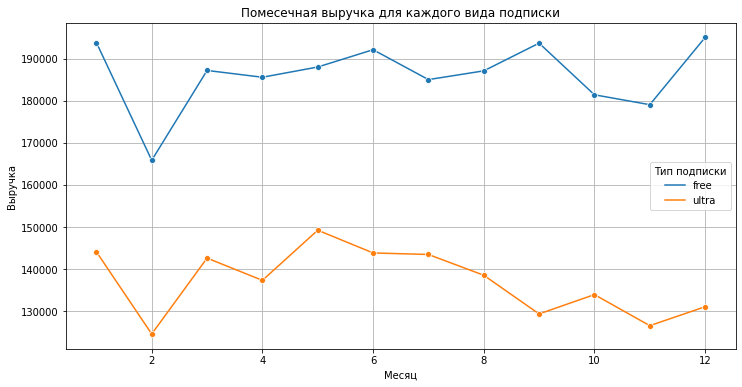

In [38]:
plt.figure(figsize=(12, 6))
sns.lineplot(data=monthly_revenue, x='month', y='revenue', hue='subscription_type', marker='o')
plt.title('Помесечная выручка для каждого вида подписки')
plt.xlabel('Месяц')
plt.ylabel('Выручка')
plt.legend(title='Тип подписки')
plt.grid(True)
plt.show()

**Выручка от тех пользователей, которые не пользуются подпиской, больше, но это связано с тем, что таких пользователей больше в целом. Если разделить выручку на одного пользователя, то получится, что выручка без подписки составляет 328, а с подпиской — 362.**

**В феврале выручка снижается в обеих категориях, вероятно, из-за погодных условий. С наступлением весны она начинает расти.
Пик выручки среди подписчиков приходится на май, после чего она постепенно снижается. Пользователи без подписки наиболее активны в сентябре, возможно, это связано с началом учебного года. В то же время количество подписчиков значительно уменьшается.**

#### Проверка гипотез

Продакт-менеджеры сервиса хотят увеличить количество пользователей с подпиской. Для этого они будут проводить различные акции, но сначала нужно выяснить несколько важных моментов.


6.1 Важно понять, тратят ли пользователи с подпиской больше времени на поездки? Если да, то пользователи с подпиской могут быть «выгоднее» для компании. 

Н0: продолжительность поездки с подпиской равны поездкам без подписки  
Н1: продолжительность поездки с подпиской больше поездок без подписки  

In [39]:
alpha = 0.05 # уровень статистической значимости

results = st.ttest_ind(
    user_ultra['duration'], 
    user_free['duration'],
    alternative='greater',
   # equal_var=False
)

print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу') 

p-значение: 1.2804098316645618e-34
Отвергаем нулевую гипотезу


**Нулевая гипотеза не подтвердилась. Можно предположить, что в среднем поездки с подпиской длятся дольше, чем без неё, хотя это не так очевидно на гистограммах**.

6.2 Расстояние одной поездки в 3130 метров — оптимальное с точки зрения износа самоката. Можно ли сказать, что среднее расстояние, которое проезжают пользователи с подпиской за одну поездку, не превышает 3130 метров? 


Н0: Среднее расстояние поездок с подпиской равно 3130 метров  
Н1: Среднее расстояние поездок с подпиской больше 3130 метров

In [40]:
distance = 3130
alpha = 0.05

results = st.ttest_1samp(
    user_ultra['distance'], 
    distance,
    alternative='greater')

print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')

p-значение: 0.9195368847849785
Не получилось отвергнуть нулевую гипотезу


**Не удалось опровергнуть нулевую гипотезу, поэтому можно сделать вывод, что среднее расстояние поездок пользователей с подпиской не превышает оптимального значения в 3130 метров для предотвращения износа самоката.**

6.3 Проверьте гипотезу о том, будет ли помесячная выручка от пользователей с подпиской по месяцам выше, чем выручка от пользователей без подписки. 


Н0: Помесячная выручка от пользователей с подпиской равна помесячной выручке от пользователей без подписки  
Н1: Помесячная выручка от пользователей с подпиской больше помесячной выручки от пользователей без подписки

In [41]:
alpha = 0.05 

results = st.ttest_ind(
    monthly_revenue[monthly_revenue['subscription_type'] == 'free']['revenue'], 
    monthly_revenue[monthly_revenue['subscription_type'] == 'ultra']['revenue'],
    alternative='greater'
)

print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу') 

p-значение: 2.398141735996644e-13
Отвергаем нулевую гипотезу


**Нулевая гипотеза была отвергнута. Это позволяет сделать вывод, что средняя месячная выручка от подписчиков выше, чем от обычных пользователей.**

6.4 Представьте такую ситуацию: техническая команда сервиса обновила сервера, с которыми взаимодействует мобильное приложение. Она надеется, что из-за этого количество обращений в техподдержку значимо снизилось. Некоторый файл содержит для каждого пользователя данные о количестве обращений до обновления и после него. Какой тест вам понадобился бы для проверки этой гипотезы?

**В данной ситуации, когда у нас есть данные о количестве обращений в техподдержку для каждого пользователя до и после обновления сервера, можно использовать парный t-тест. Этот тест подходит для сравнения двух связанных выборок, чтобы определить, есть ли статистически значимая разница между их средними значениями.**

#### Выводы

Больше всего пользователей зарегистрировано в Пятигорске, а меньше всего — в Москве. В остальных городах количество пользователей примерно одинаково.

45,6% пользователей имеют подписку, а 54,4% — нет.

Среди пользователей сервиса преобладают люди в возрасте от 22 до 28 лет.

Среднее расстояние, которое проезжают пользователи за одну поездку, составляет 3,13 км.
Пользователи без подписки имеют более широкий диапазон значений расстояния по сравнению с пользователями с подпиской.

Поездка обычно длится 17,8 минуты, при этом медиана составляет 17,6 минуты. Время поездки у пользователей обеих категорий примерно одинаковое. В среднем пользователи с подпиской используют самокат 18 минут, а пользователи без подписки — 17 минут.

95 поездок заняли всего полминуты, при этом пользователи проехали расстояние от 4 км. Самокаты не могут развивать такую скорость. Стоит обратить на это внимание.

Выручка от тех пользователей, которые не пользуются подпиской, больше, но это связано с тем, что таких пользователей больше в целом. Если разделить выручку на одного пользователя, то получится, что выручка без подписки составляет 328, а с подпиской — 362.  
В феврале выручка снижается в обеих категориях, вероятно, из-за погодных условий. С наступлением весны она начинает расти. Пик выручки среди подписчиков приходится на май, после чего она постепенно снижается. Пользователи без подписки наиболее активны в сентябре, возможно, это связано с началом учебного года. В то же время количество подписчиков значительно уменьшается.


Можно предположить, что в среднем поездки с подпиской длятся дольше, чем без неё, хотя это не так очевидно на гистограммах.

Среднее расстояние поездок пользователей с подпиской не превышает оптимального значения в 3130 метров для предотвращения износа самоката.

Средний доход от подписчиков за месяц больше, чем от обычных пользователей.
